<a href="https://colab.research.google.com/github/lNamelessl/ML-Projects/blob/main/Handwritten_Digits_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf

In [15]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [16]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [17]:
# check shape
X_train.shape

(60000, 28, 28)

In [18]:
y_train.shape

(60000,)

In [19]:
X_test.shape

(10000, 28, 28)

In [20]:
y_test.shape

(10000,)

In [21]:
import seaborn as sns

In [22]:
import numpy as np


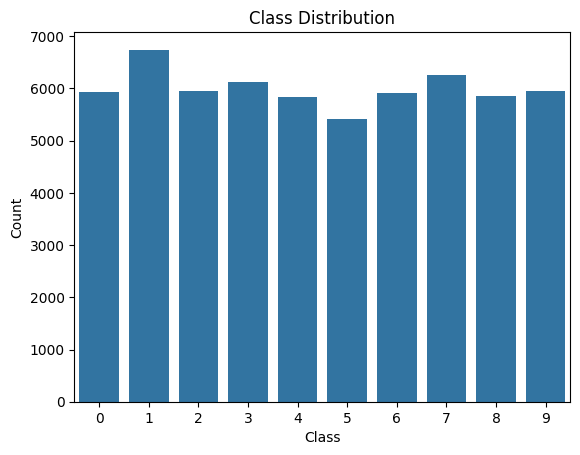

In [23]:
# Class distriution
sns.countplot(x=y_train)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

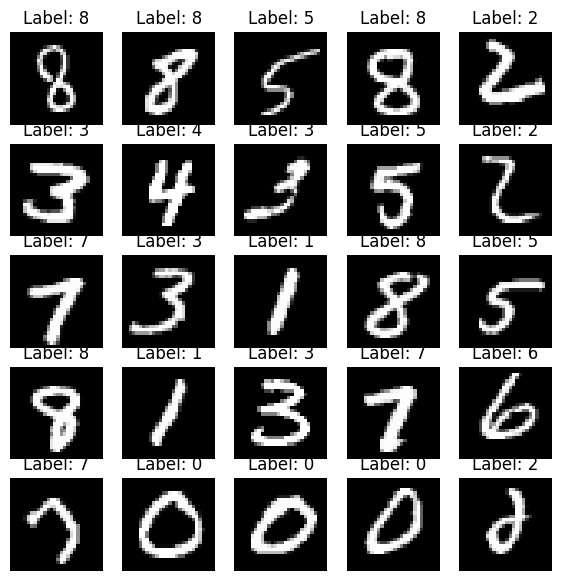

In [24]:
# 5x5 image grid
plt.figure(figsize=(7, 7))
for i in range(25):
  idx = np.random.randint(0, len(X_train))
  plt.subplot(5, 5, i + 1)
  plt.imshow(X_train[idx].reshape(28, 28), cmap='gray')
  plt.axis('off')
  plt.title(f"Label: {y_train[idx]}")
plt.show()

In [25]:
import pandas as pd

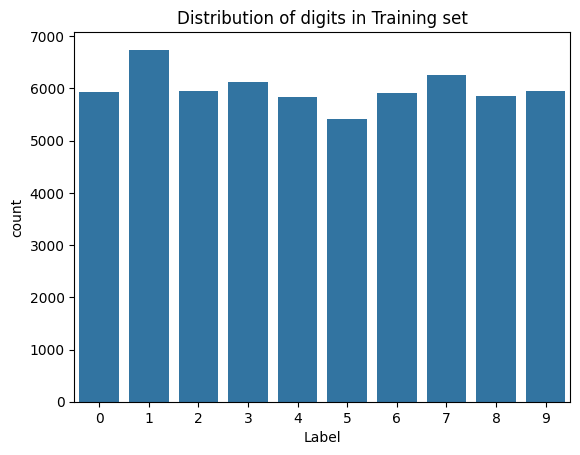

In [26]:
# convert labels to df for easier plotting
label_df = pd.DataFrame({'Label': y_train})
sns.countplot(x='Label', data=label_df)
plt.title("Distribution of digits in Training set")
plt.show()

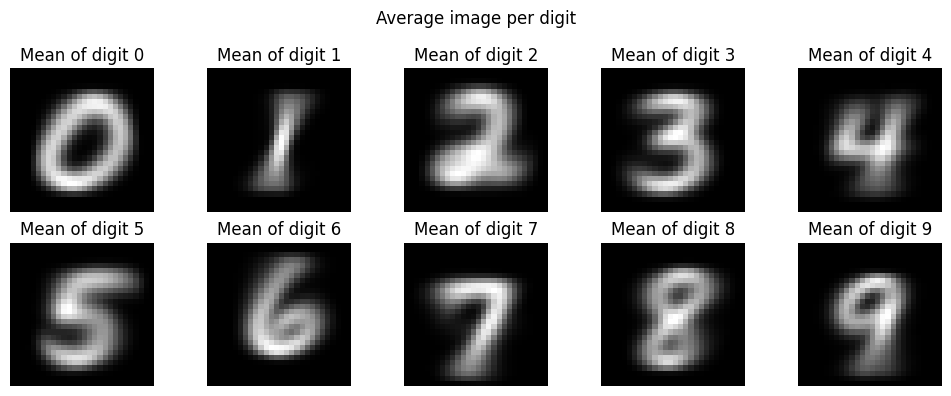

In [27]:
mean_images = np.zeros((10, 28, 28))
plt.figure(figsize=(10, 4))
for digit in range(10):
  mean_images[digit] = np.mean(X_train[y_train == digit], axis=0)
  plt.subplot(2, 5, digit + 1)
  plt.imshow(mean_images[digit], cmap='gray')
  plt.title(f"Mean of digit {digit}")
  plt.axis("off")

plt.suptitle("Average image per digit")
plt.tight_layout()
plt.show()


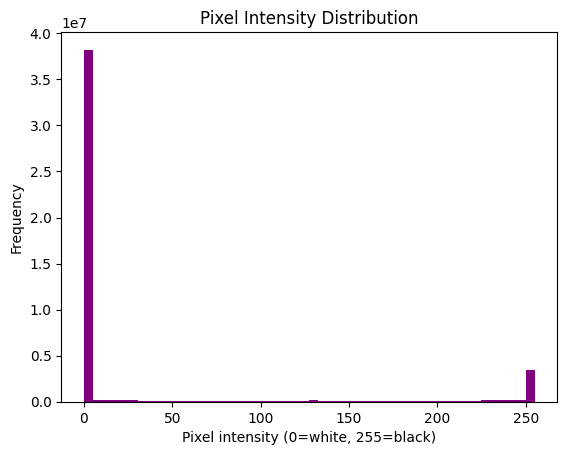

In [28]:
plt.hist(X_train.reshape(-1), bins=50, color='purple')
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel intensity (0=white, 255=black)")
plt.ylabel("Frequency")
plt.show()

In [29]:
# Normalize and reshape
x_train = X_train.reshape(-1, 28, 28, 1) / 255.0
x_test = X_test.reshape(-1, 28, 28, 1) / 255.0

In [30]:
# Build a CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 29ms/step - accuracy: 0.8934 - loss: 0.3508 - val_accuracy: 0.9843 - val_loss: 0.0528
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9842 - loss: 0.0502 - val_accuracy: 0.9885 - val_loss: 0.0399
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9882 - loss: 0.0358 - val_accuracy: 0.9903 - val_loss: 0.0409
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.9919 - loss: 0.0248 - val_accuracy: 0.9892 - val_loss: 0.0387
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9945 - loss: 0.0174 - val_accuracy: 0.9895 - val_loss: 0.0404
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9959 - loss: 0.0126 - val_accuracy: 0.9920 - val_loss: 0.0302
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9966 - loss: 0.0091 - val_accuracy: 0.9902 - val_loss: 0.0470
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9982 -

In [34]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 5s - 14ms/step - accuracy: 0.9894 - loss: 0.0430
Test accuracy: 0.9894


In [35]:
# save the model
import joblib
joblib.dump(model, 'digit_classifier.pkl')


['digit_classifier.pkl']